In [193]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt

In [326]:
tickers_1 = ['TSLA', 'AMZN', 'SHOP', 'MU', 'F', 'AAPL', 'FB', 'NVDA', 'AMD', 'GOOG']
tickers_2 = ['CVX', 'XOM', 'RY', 'TD', 'PFE', 'JNJ', 'NKE', 'MCD', 'WMT', 'COST']
tickers_3 = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 12, 31)
 
df_1 = pdr.get_data_yahoo(tickers_1, start, end)
df_2 = pdr.get_data_yahoo(tickers_2, start, end)
df_3 = pdr.get_data_yahoo(tickers_3, start, end)


In [327]:
df_1

Attributes  Adj Close                                                     \
Symbols          TSLA       AMZN   SHOP         MU          F       AAPL   
Date                                                                       
2017-01-03  43.397999  37.683498  4.282  22.419943  10.085314  27.257648   
2017-01-04  45.397999  37.859001  4.414  22.231041  10.549926  27.227135   
2017-01-05  45.349998  39.022499  4.768  21.982481  10.229503  27.365601   
2017-01-06  45.801998  39.799500  4.690  21.912888  10.221493  27.670677   
2017-01-09  46.256001  39.846001  4.718  22.211153  10.117355  27.924126   
...               ...        ...    ...        ...        ...        ...   
2022-07-06        NaN        NaN    NaN        NaN        NaN        NaN   
2022-07-07        NaN        NaN    NaN        NaN        NaN        NaN   
2022-07-08        NaN        NaN    NaN        NaN        NaN        NaN   
2022-07-11        NaN        NaN    NaN        NaN        NaN        NaN   
2022-07-12        NaN        NaN    NaN        NaN        NaN        NaN   

Attributes                                            ...      Volume  \
Symbols             FB       NVDA    AMD        GOOG  ...        TSLA   
Date                                                  ...               
2017-01-03         NaN  25.161129  11.43  786.140015  ...  29616500.0   
2017-01-04         NaN  25.748169  11.43  786.900024  ...  56067500.0   
2017-01-05         NaN  25.094532  11.24  794.020020  ...  29558500.0   
2017-01-06         NaN  25.429979  11.32  806.150024  ...  27639500.0   
2017-01-09         NaN  26.460995  11.49  806.650024  ...  19897500.0   
...                ...        ...    ...         ...  ...         ...   
2022-07-06  169.770004        NaN    NaN         NaN  ...         NaN   
2022-07-07  172.190002        NaN    NaN         NaN  ...         NaN   
2022-07-08  170.880005        NaN    NaN         NaN  ...         NaN   
2022-07-11  162.880005        NaN    NaN         NaN  ...         NaN   
2022-07-12  163.270004        NaN    NaN         NaN  ...         NaN   

Attributes                                                                \
Symbols            AMZN        SHOP          MU           F         AAPL   
Date                                                                       
2017-01-03   70422000.0   7054000.0  24962900.0  40510800.0  115127600.0   
2017-01-04   50210000.0   8481000.0  20426800.0  77638100.0   84472400.0   
2017-01-05  116602000.0  50702000.0  19759400.0  75628400.0   88774400.0   
2017-01-06  119724000.0  20613000.0  17782200.0  40315900.0  127007600.0   
2017-01-09   68922000.0   9211000.0  21537200.0  39438400.0  134247600.0   
...                 ...         ...         ...         ...          ...   
2022-07-06          NaN         NaN         NaN         NaN          NaN   
2022-07-07          NaN         NaN         NaN         NaN          NaN   
2022-07-08          NaN         NaN         NaN         NaN          NaN   
2022-07-11          NaN         NaN         NaN         NaN          NaN   
2022-07-12          NaN         NaN         NaN         NaN          NaN   

Attributes                                                  
Symbols             FB         NVDA         AMD       GOOG  
Date                                                        
2017-01-03         NaN  150199600.0  55182000.0  1657300.0  
2017-01-04         NaN  119922000.0  40781200.0  1073000.0  
2017-01-05         NaN   98429600.0  38855200.0  1335200.0  
2017-01-06         NaN   82285600.0  34453500.0  1640200.0  
2017-01-09         NaN   91624800.0  37304800.0  1274600.0  
...                ...          ...         ...        ...  
2022-07-06  23085900.0          NaN         NaN        NaN  
2022-07-07  24083400.0          NaN         NaN        NaN  
2022-07-08  19236000.0          NaN         NaN        NaN  
2022-07-11  21885600.0          NaN         NaN        NaN  
2022-07-12  16639659.0          NaN         NaN       

In [328]:
# Drop all the columns except close
df_1 = df_1.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [329]:
df_1

Attributes      Close                                                 \
Symbols          TSLA       AMZN   SHOP         MU      F       AAPL   
Date                                                                   
2017-01-03  43.397999  37.683498  4.282  22.549999  12.59  29.037500   
2017-01-04  45.397999  37.859001  4.414  22.360001  13.17  29.004999   
2017-01-05  45.349998  39.022499  4.768  22.110001  12.77  29.152500   
2017-01-06  45.801998  39.799500  4.690  22.040001  12.76  29.477501   
2017-01-09  46.256001  39.846001  4.718  22.340000  12.63  29.747499   
...               ...        ...    ...        ...    ...        ...   
2022-07-06        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-07        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-08        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-11        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-12        NaN        NaN    NaN        NaN    NaN        NaN   

Attributes                                            
Symbols             FB       NVDA    AMD        GOOG  
Date                                                  
2017-01-03         NaN  25.502501  11.43  786.140015  
2017-01-04         NaN  26.097500  11.43  786.900024  
2017-01-05         NaN  25.434999  11.24  794.020020  
2017-01-06         NaN  25.775000  11.32  806.150024  
2017-01-09         NaN  26.820000  11.49  806.650024  
...                ...        ...    ...         ...  
2022-07-06  169.770004        NaN    NaN         NaN  
2022-07-07  172.190002        NaN    NaN         NaN  
2022-07-08  170.880005        NaN    NaN         NaN  
2022-07-11  162.880005        NaN    NaN         NaN  
2022-07-12  163.270004        NaN    NaN         NaN  

[1390 rows x 10 columns]

In [330]:
# Count nulls
df_1.isnull().mean() * 100
df_1.isnull().sum()

Attributes  Symbols
Close       TSLA        131
            AMZN        131
            SHOP        131
            MU          131
            F           131
            AAPL        131
            FB         1138
            NVDA        131
            AMD         131
            GOOG        131
dtype: int64

In [243]:
df_2

Attributes   Adj Close                                               \
Symbols            CVX        XOM          RY         TD        PFE   
Date                                                                  
2017-01-03   92.566833  68.523422   56.216827  39.724445  25.524946   
2017-01-04   92.543251  67.769516   57.561607  40.562180  25.749262   
2017-01-05   92.142670  66.759270   57.817360  40.865360  25.996777   
2017-01-06   91.773514  66.721565   57.809116  40.918442  25.896223   
2017-01-09   90.988045  65.620842   57.701866  40.749527  25.888489   
...                ...        ...         ...        ...        ...   
2021-12-27  116.596573  60.590767  103.798820  74.309334  58.278034   
2021-12-28  116.370819  60.394966  103.936455  74.338493  57.106567   
2021-12-29  115.772079  59.866302  103.503922  74.037247  56.683270   
2021-12-30  115.261681  59.513859  103.700523  74.144142  57.490498   
2021-12-31  115.183167  59.905460  104.339493  74.513405  58.130367   

Attributes                                                              ...  \
Symbols            JNJ         NKE         MCD         WMT        COST  ...   
Date                                                                    ...   
2017-01-03  100.231377   49.111877  104.759361   61.578640  142.145782  ...   
2017-01-04  100.066956   50.141731  104.636742   61.937370  142.172440  ...   
2017-01-05  101.113945   50.132282  104.829399   62.071880  144.975708  ...   
2017-01-06  100.629395   50.935394  105.757713   61.219887  144.904495  ...   
2017-01-09  100.612076   50.434639  105.468719   61.623466  143.249237  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  167.511383  166.785263  265.285767  139.709854  561.703369  ...   
2021-12-28  168.182739  165.630768  264.929749  141.714783  562.869812  ...   
2021-12-29  169.367462  167.979553  265.533020  141.645309  565.989929  ...   
2021-12-30  170.117798  166.695694  264.267120  142.101868  562.142029  ...   
2021-12-31  168.893585  165.879562  265.117676  143.610519  565.920166  ...   

Attributes     Volume                                                \
Symbols           CVX         XOM         RY         TD         PFE   
Date                                                                  
2017-01-03  7404800.0  10360600.0   853600.0  1310200.0  23391844.0   
2017-01-04  6679900.0   9434200.0  1719800.0  1528800.0  22753963.0   
2017-01-05  5928600.0  14443200.0  1183100.0  2226300.0  21083584.0   
2017-01-06  4762500.0  16518100.0   919000.0  1462300.0  18418228.0   
2017-01-09  6891800.0  13762300.0   712500.0  1114200.0  21559886.0   
...               ...         ...        ...        ...         ...   
2021-12-27  7745500.0  12593700.0   552100.0   845300.0  27362600.0   
2021-12-28  6516000.0  12781000.0   502100.0   964700.0  36901700.0   
2021-12-29  6957400.0  12733600.0   785700.0  1256200.0  26170200.0   
2021-12-30  6016000.0  11940300.0   941900.0   841200.0  24559000.0   
2021-12-31  5706600.0  14072000.0   878300.0   939500.0  28579600.0   

Attributes                                                           
Symbols           JNJ         NKE        MCD         WMT       COST  
Date                                                                 
2017-01-03  5953000.0  13295600.0  5123800.0  10473200.0  2099000.0  
2017-01-04  5828900.0  13759500.0  3780800.0   7918000.0  2163600.0  
2017-01-05  6217200.0   8682200.0  4261100.0   7099200.0  2880900.0  
2017-01-06  5221400.0  12532400.0  4089200.0   9491100.0  2167000.0  
2017-01-09  5457500.0   8835300.0  3021800.0   8685200.0  2318300.0  
...               ...         ...        ...         ...        ...  
2021-12-27  3704800.0   3769300.0  1485500.0   5346900.0  2262900.0  
2021-12-28  3187000.0   2658600.0  1304000.0   5261000.0  1155000.0  
2021-12-29  3662000.0   3830900.0  1318500.0   4348400.0  1753000.0  
2021-12-30  4231800.0   2666800.0  1714600.0   4983000.0  13387

In [244]:
# Drop all the columns except close
df_2 = df_2.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [245]:
df_2 

Attributes       Close                                               \
Symbols            CVX        XOM          RY         TD        PFE   
Date                                                                  
2017-01-03  117.849998  90.889999   68.139999  49.790001  31.309298   
2017-01-04  117.820000  89.889999   69.769997  50.840000  31.584440   
2017-01-05  117.309998  88.550003   70.080002  51.220001  31.888046   
2017-01-06  116.839996  88.500000   70.070000  50.869999  31.764706   
2017-01-09  115.839996  87.040001   69.940002  50.660000  31.755219   
...                ...        ...         ...        ...        ...   
2021-12-27  118.790001  61.889999  105.589996  76.470001  59.200001   
2021-12-28  118.559998  61.689999  105.730003  76.500000  58.009998   
2021-12-29  117.949997  61.150002  105.290001  76.190002  57.580002   
2021-12-30  117.430000  60.790001  105.489998  76.300003  58.400002   
2021-12-31  117.349998  61.189999  106.139999  76.680000  59.049999   

Attributes                                                              
Symbols            JNJ         NKE         MCD         WMT        COST  
Date                                                                    
2017-01-03  115.839996   51.980000  119.620003   68.660004  159.729996  
2017-01-04  115.650002   53.070000  119.480003   69.059998  159.759995  
2017-01-05  116.860001   53.060001  119.699997   69.209999  162.910004  
2017-01-06  116.300003   53.910000  120.760002   68.260002  162.830002  
2017-01-09  116.279999   53.380001  120.430000   68.709999  160.970001  
...                ...         ...         ...         ...         ...  
2021-12-27  169.669998  167.580002  268.239990  140.759995  563.469971  
2021-12-28  170.350006  166.419998  267.880005  142.779999  564.640015  
2021-12-29  171.550003  168.779999  268.489990  142.710007  567.770020  
2021-12-30  172.309998  167.490005  267.209991  143.169998  563.909973  
2021-12-31  171.070007  166.669998  268.070007  144.690002  567.700012  

[1259 rows x 10 columns]

In [246]:
df_3

Attributes  Adj Close                                                 \
Symbols           ENB ATH.TO NVA.TO        TVE        CNR         CP   
Date                                                                   
2017-01-03  31.614695   2.05   6.86  21.380133  16.049999  26.817808   
2017-01-04  31.837639   2.05   7.02  21.336857  16.100000  27.674887   
2017-01-05  32.209232   2.00   6.90  21.380133  15.650000  27.904325   
2017-01-06  32.409889   2.00   6.87  21.336857  15.900000  28.184965   
2017-01-09  32.290985   1.90   6.73  21.336857  15.500000  27.587662   
...               ...    ...    ...        ...        ...        ...   
2021-12-27  37.264004    NaN    NaN  25.306337  17.200001  70.991798   
2021-12-28  37.128288    NaN    NaN  25.375534  17.200001  71.031555   
2021-12-29  37.215534   1.19   7.21  25.484274  17.450001  71.598137   
2021-12-30  37.467583   1.20   6.98  25.286566  17.219999  71.308273   
2021-12-31  37.884426   1.19   6.96  25.622667  17.440001  71.656906   

Attributes                                               ...     Volume  \
Symbols           BNS         TRI        BCE     ATD.TO  ...        ENB   
Date                                                     ...              
2017-01-03  43.263424   39.049103  33.604252  30.151217  ...  2125000.0   
2017-01-04  44.076817   39.485352  34.075813  30.416540  ...  2373500.0   
2017-01-05  44.345394   39.823669  34.400490  30.686697  ...  2339600.0   
2017-01-06  44.414455   39.903790  34.214951  30.503376  ...  1598500.0   
2017-01-09  44.268669   39.672314  33.851627  30.681871  ...  2084800.0   
...               ...         ...        ...        ...  ...        ...   
2021-12-27  68.403175  117.405319  51.038330        NaN  ...  2577700.0   
2021-12-28  68.740799  117.544052  50.949585        NaN  ...  2269100.0   
2021-12-29  68.846909  117.553955  50.801678  52.775509  ...  3079800.0   
2021-12-30  69.194191  117.553955  50.979168  53.253475  ...  3304700.0   
2021-12-31  69.920799  118.534981  51.314426  52.775509  ...  3780100.0   

Attributes                                                                \
Symbols        ATH.TO    NVA.TO      TVE       CNR         CP        BNS   
Date                                                                       
2017-01-03  2542000.0  643900.0   7100.0  452400.0  3396500.0   683600.0   
2017-01-04  2225200.0  628900.0  10700.0  285700.0  4629500.0   815100.0   
2017-01-05  2362000.0  357600.0   9500.0  461000.0  4231500.0   593200.0   
2017-01-06   784800.0  409500.0  13400.0  392900.0  3502500.0   438600.0   
2017-01-09  1985700.0  472300.0   9700.0  330800.0  3974500.0   500500.0   
...               ...       ...      ...       ...        ...        ...   
2021-12-27        NaN       NaN  25200.0  518800.0  5462400.0   855800.0   
2021-12-28        NaN       NaN  11000.0  343600.0  4992400.0  1183500.0   
2021-12-29  3302500.0  821300.0  11800.0  444900.0  3198600.0  1319000.0   
2021-12-30   968100.0  354400.0  14300.0  407700.0  2141500.0  1782700.0   
2021-12-31   818300.0  299200.0  10500.0  605200.0  2071100.0  3672700.0   

Attributes                                 
Symbols          TRI        BCE    ATD.TO  
Date                                       
2017-01-03  525100.0  1015800.0   10200.0  
2017-01-04  935000.0   781000.0    5400.0  
2017-01-05  768400.0  1073200.0   10000.0  
2017-01-06  392600.0   928100.0    4000.0  
2017-01-09  794800.0  1133600.0    1800.0  
...              ...        ...       ...  
2021-12-27  137500.0   434500.0       NaN  
2021-12-28  136200.0   552200.0       NaN  
2021-12-29  315400.0   656400.0  954500.0  
2021-12-30  162000.0   697700.0  617800.0  
2021-12-31  239000.0   712800.0  797900.0  

[1281 rows x 60 columns]

In [247]:
# Drop all the columns except close
df_3 = df_3.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [248]:
df_3

Attributes      Close                                                 \
Symbols           ENB ATH.TO NVA.TO        TVE        CNR         CP   
Date                                                                   
2017-01-03  42.540001   2.05   6.86  24.700001  16.049999  28.285999   
2017-01-04  42.840000   2.05   7.02  24.650000  16.100000  29.190001   
2017-01-05  43.340000   2.00   6.90  24.700001  15.650000  29.431999   
2017-01-06  43.610001   2.00   6.87  24.650000  15.900000  29.728001   
2017-01-09  43.450001   1.90   6.73  24.650000  15.500000  29.098000   
...               ...    ...    ...        ...        ...        ...   
2021-12-27  38.439999    NaN    NaN  25.600000  17.200001  71.419998   
2021-12-28  38.299999    NaN    NaN  25.670000  17.200001  71.459999   
2021-12-29  38.389999   1.19   7.21  25.780001  17.450001  72.029999   
2021-12-30  38.650002   1.20   6.98  25.580000  17.219999  71.589996   
2021-12-31  39.080002   1.19   6.96  25.920000  17.440001  71.940002   

Attributes                                               
Symbols           BNS         TRI        BCE     ATD.TO  
Date                                                     
2017-01-03  56.380001   43.860001  43.470001  31.250000  
2017-01-04  57.439999   44.349998  44.080002  31.525000  
2017-01-05  57.790001   44.730000  44.500000  31.805000  
2017-01-06  57.880001   44.820000  44.259998  31.615000  
2017-01-09  57.689999   44.560001  43.790001  31.799999  
...               ...         ...        ...        ...  
2021-12-27  70.910004  118.480003  51.759998        NaN  
2021-12-28  71.260002  118.620003  51.669998        NaN  
2021-12-29  71.370003  118.629997  51.520000  53.000000  
2021-12-30  71.730003  118.629997  51.700001  53.480000  
2021-12-31  71.690002  119.620003  52.040001  53.000000  

[1281 rows x 10 columns]

In [249]:
# Count nulls
df_2.isnull().mean() * 100
df_2.isnull().sum()

Attributes  Symbols
Close       CVX        0
            XOM        0
            RY         0
            TD         0
            PFE        0
            JNJ        0
            NKE        0
            MCD        0
            WMT        0
            COST       0
dtype: int64

In [331]:
df_1

Attributes      Close                                                 \
Symbols          TSLA       AMZN   SHOP         MU      F       AAPL   
Date                                                                   
2017-01-03  43.397999  37.683498  4.282  22.549999  12.59  29.037500   
2017-01-04  45.397999  37.859001  4.414  22.360001  13.17  29.004999   
2017-01-05  45.349998  39.022499  4.768  22.110001  12.77  29.152500   
2017-01-06  45.801998  39.799500  4.690  22.040001  12.76  29.477501   
2017-01-09  46.256001  39.846001  4.718  22.340000  12.63  29.747499   
...               ...        ...    ...        ...    ...        ...   
2022-07-06        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-07        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-08        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-11        NaN        NaN    NaN        NaN    NaN        NaN   
2022-07-12        NaN        NaN    NaN        NaN    NaN        NaN   

Attributes                                            
Symbols             FB       NVDA    AMD        GOOG  
Date                                                  
2017-01-03         NaN  25.502501  11.43  786.140015  
2017-01-04         NaN  26.097500  11.43  786.900024  
2017-01-05         NaN  25.434999  11.24  794.020020  
2017-01-06         NaN  25.775000  11.32  806.150024  
2017-01-09         NaN  26.820000  11.49  806.650024  
...                ...        ...    ...         ...  
2022-07-06  169.770004        NaN    NaN         NaN  
2022-07-07  172.190002        NaN    NaN         NaN  
2022-07-08  170.880005        NaN    NaN         NaN  
2022-07-11  162.880005        NaN    NaN         NaN  
2022-07-12  163.270004        NaN    NaN         NaN  

[1390 rows x 10 columns]

In [332]:
def compute_daily_returns1(df_1):
    """Compute and return the daily return values"""
    daily_returns = df_1.pct_change()
    return daily_returns


In [333]:
# Calculate daily returns of the Portfoli0

daily_returns1 = compute_daily_returns1(df_1)
daily_returns1

Attributes     Close                                                    \
Symbols         TSLA      AMZN      SHOP        MU         F      AAPL   
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.046085  0.004657  0.030827 -0.008426  0.046068 -0.001119   
2017-01-05 -0.001057  0.030732  0.080199 -0.011181 -0.030372  0.005085   
2017-01-06  0.009967  0.019912 -0.016359 -0.003166 -0.000783  0.011148   
2017-01-09  0.009912  0.001168  0.005970  0.013612 -0.010188  0.009159   
...              ...       ...       ...       ...       ...       ...   
2022-07-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-08  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Attributes                                          
Symbols           FB      NVDA       AMD      GOOG  
Date                                                
2017-01-03       NaN       NaN       NaN       NaN  
2017-01-04       NaN  0.023331  0.000000  0.000967  
2017-01-05       NaN -0.025386 -0.016623  0.009048  
2017-01-06       NaN  0.013367  0.007117  0.015277  
2017-01-09       NaN  0.040543  0.015018  0.000620  
...              ...       ...       ...       ...  
2022-07-06  0.009394  0.000000  0.000000  0.000000  
2022-07-07  0.014255  0.000000  0.000000  0.000000  
2022-07-08 -0.007608  0.000000  0.000000  0.000000  
2022-07-11 -0.046816  0.000000  0.000000  0.000000  
2022-07-12  0.002394  0.000000  0.000000  0.000000  

[1390 rows x 10 columns]

In [208]:
# Count nulls
df_3.isnull().mean() * 100
df_3.isnull().sum()

Attributes  Symbols
Close       ENB           0
            TVE           0
            CNR           0
            BNS           0
            TRI           0
            BCE           0
            ATH        1259
            NVA        1259
            BAM.A      1259
            ATD        1259
dtype: int64

In [270]:
def compute_daily_returns2(df_2):
    """Compute and return the daily return values"""
    daily_returns = df_2.pct_change()
    return daily_returns

In [271]:
# Calculate daily returns of the Portfoli0

daily_returns2 = compute_daily_returns2(df_2)
daily_returns2

Attributes     Close                                                    \
Symbols          CVX       XOM        RY        TD       PFE       JNJ   
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.000255 -0.011002  0.023921  0.021089  0.008788 -0.001640   
2017-01-05 -0.004329 -0.014907  0.004443  0.007474  0.009613  0.010463   
2017-01-06 -0.004006 -0.000565 -0.000143 -0.006833 -0.003868 -0.004792   
2017-01-09 -0.008559 -0.016497 -0.001855 -0.004128 -0.000299 -0.000172   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.020445  0.014258  0.012077  0.017836  0.008346  0.008440   
2021-12-28 -0.001936 -0.003232  0.001326  0.000392 -0.020101  0.004008   
2021-12-29 -0.005145 -0.008753 -0.004162 -0.004052 -0.007412  0.007044   
2021-12-30 -0.004409 -0.005887  0.001899  0.001444  0.014241  0.004430   
2021-12-31 -0.000681  0.006580  0.006162  0.004980  0.011130 -0.007196   

Attributes                                          
Symbols          NKE       MCD       WMT      COST  
Date                                                
2017-01-03       NaN       NaN       NaN       NaN  
2017-01-04  0.020970 -0.001170  0.005826  0.000188  
2017-01-05 -0.000188  0.001841  0.002172  0.019717  
2017-01-06  0.016020  0.008856 -0.013726 -0.000491  
2017-01-09 -0.009831 -0.002733  0.006592 -0.011423  
...              ...       ...       ...       ...  
2021-12-27  0.011529  0.008611  0.009105  0.023802  
2021-12-28 -0.006922 -0.001342  0.014351  0.002076  
2021-12-29  0.014181  0.002277 -0.000490  0.005543  
2021-12-30 -0.007643 -0.004767  0.003223 -0.006799  
2021-12-31 -0.004896  0.003219  0.010617  0.006721  

[1259 rows x 10 columns]

In [255]:
def compute_daily_returns3(df_3):
    """Compute and return the daily return values"""
    daily_returns = df_3.pct_change()
    return daily_returns

In [259]:
# Calculate daily returns of the Portfoli0

daily_returns3 = compute_daily_returns3(df_3)
daily_returns3

Attributes     Close                                                    \
Symbols          ENB    ATH.TO    NVA.TO       TVE       CNR        CP   
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.007052  0.000000  0.023324 -0.002024  0.003115  0.031959   
2017-01-05  0.011671 -0.024390 -0.017094  0.002028 -0.027950  0.008290   
2017-01-06  0.006230  0.000000 -0.004348 -0.002024  0.015974  0.010057   
2017-01-09 -0.003669 -0.050000 -0.020378  0.000000 -0.025157 -0.021192   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.011579  0.000000  0.000000  0.005104  0.046866  0.002386   
2021-12-28 -0.003642  0.000000  0.000000  0.002734  0.000000  0.000560   
2021-12-29  0.002350  0.017094  0.038905  0.004285  0.014535  0.007976   
2021-12-30  0.006773  0.008403 -0.031900 -0.007758 -0.013181 -0.006109   
2021-12-31  0.011125 -0.008333 -0.002865  0.013292  0.012776  0.004889   

Attributes                                          
Symbols          BNS       TRI       BCE    ATD.TO  
Date                                                
2017-01-03       NaN       NaN       NaN       NaN  
2017-01-04  0.018801  0.011172  0.014033  0.008800  
2017-01-05  0.006093  0.008568  0.009528  0.008882  
2017-01-06  0.001557  0.002012 -0.005393 -0.005974  
2017-01-09 -0.003283 -0.005801 -0.010619  0.005852  
...              ...       ...       ...       ...  
2021-12-27  0.016048  0.013863  0.008967  0.000000  
2021-12-28  0.004936  0.001182 -0.001739  0.000000  
2021-12-29  0.001544  0.000084 -0.002903  0.010486  
2021-12-30  0.005044  0.000000  0.003494  0.009057  
2021-12-31 -0.000558  0.008345  0.006576 -0.008975  

[1281 rows x 10 columns]

In [324]:
daily_returns1 = daily_returns1.dropna()

In [334]:
daily_returns1


Attributes     Close                                                    \
Symbols         TSLA      AMZN      SHOP        MU         F      AAPL   
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.046085  0.004657  0.030827 -0.008426  0.046068 -0.001119   
2017-01-05 -0.001057  0.030732  0.080199 -0.011181 -0.030372  0.005085   
2017-01-06  0.009967  0.019912 -0.016359 -0.003166 -0.000783  0.011148   
2017-01-09  0.009912  0.001168  0.005970  0.013612 -0.010188  0.009159   
...              ...       ...       ...       ...       ...       ...   
2022-07-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-08  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-07-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Attributes                                          
Symbols           FB      NVDA       AMD      GOOG  
Date                                                
2017-01-03       NaN       NaN       NaN       NaN  
2017-01-04       NaN  0.023331  0.000000  0.000967  
2017-01-05       NaN -0.025386 -0.016623  0.009048  
2017-01-06       NaN  0.013367  0.007117  0.015277  
2017-01-09       NaN  0.040543  0.015018  0.000620  
...              ...       ...       ...       ...  
2022-07-06  0.009394  0.000000  0.000000  0.000000  
2022-07-07  0.014255  0.000000  0.000000  0.000000  
2022-07-08 -0.007608  0.000000  0.000000  0.000000  
2022-07-11 -0.046816  0.000000  0.000000  0.000000  
2022-07-12  0.002394  0.000000  0.000000  0.000000  

[1390 rows x 10 columns]

In [272]:
daily_returns2 = daily_returns2.dropna()

In [273]:
daily_returns2

Attributes     Close                                                    \
Symbols          CVX       XOM        RY        TD       PFE       JNJ   
Date                                                                     
2017-01-04 -0.000255 -0.011002  0.023921  0.021089  0.008788 -0.001640   
2017-01-05 -0.004329 -0.014907  0.004443  0.007474  0.009613  0.010463   
2017-01-06 -0.004006 -0.000565 -0.000143 -0.006833 -0.003868 -0.004792   
2017-01-09 -0.008559 -0.016497 -0.001855 -0.004128 -0.000299 -0.000172   
2017-01-10 -0.007597 -0.012753  0.005290  0.001579 -0.000896 -0.001032   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.020445  0.014258  0.012077  0.017836  0.008346  0.008440   
2021-12-28 -0.001936 -0.003232  0.001326  0.000392 -0.020101  0.004008   
2021-12-29 -0.005145 -0.008753 -0.004162 -0.004052 -0.007412  0.007044   
2021-12-30 -0.004409 -0.005887  0.001899  0.001444  0.014241  0.004430   
2021-12-31 -0.000681  0.006580  0.006162  0.004980  0.011130 -0.007196   

Attributes                                          
Symbols          NKE       MCD       WMT      COST  
Date                                                
2017-01-04  0.020970 -0.001170  0.005826  0.000188  
2017-01-05 -0.000188  0.001841  0.002172  0.019717  
2017-01-06  0.016020  0.008856 -0.013726 -0.000491  
2017-01-09 -0.009831 -0.002733  0.006592 -0.011423  
2017-01-10 -0.005058 -0.001495 -0.006986  0.004287  
...              ...       ...       ...       ...  
2021-12-27  0.011529  0.008611  0.009105  0.023802  
2021-12-28 -0.006922 -0.001342  0.014351  0.002076  
2021-12-29  0.014181  0.002277 -0.000490  0.005543  
2021-12-30 -0.007643 -0.004767  0.003223 -0.006799  
2021-12-31 -0.004896  0.003219  0.010617  0.006721  

[1258 rows x 10 columns]

In [274]:
daily_returns3 = daily_returns3.dropna()

In [275]:
daily_returns3

Attributes     Close                                                    \
Symbols          ENB    ATH.TO    NVA.TO       TVE       CNR        CP   
Date                                                                     
2017-01-04  0.007052  0.000000  0.023324 -0.002024  0.003115  0.031959   
2017-01-05  0.011671 -0.024390 -0.017094  0.002028 -0.027950  0.008290   
2017-01-06  0.006230  0.000000 -0.004348 -0.002024  0.015974  0.010057   
2017-01-09 -0.003669 -0.050000 -0.020378  0.000000 -0.025157 -0.021192   
2017-01-10 -0.014499 -0.005263 -0.017831  0.002434  0.029032  0.005499   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.011579  0.000000  0.000000  0.005104  0.046866  0.002386   
2021-12-28 -0.003642  0.000000  0.000000  0.002734  0.000000  0.000560   
2021-12-29  0.002350  0.017094  0.038905  0.004285  0.014535  0.007976   
2021-12-30  0.006773  0.008403 -0.031900 -0.007758 -0.013181 -0.006109   
2021-12-31  0.011125 -0.008333 -0.002865  0.013292  0.012776  0.004889   

Attributes                                          
Symbols          BNS       TRI       BCE    ATD.TO  
Date                                                
2017-01-04  0.018801  0.011172  0.014033  0.008800  
2017-01-05  0.006093  0.008568  0.009528  0.008882  
2017-01-06  0.001557  0.002012 -0.005393 -0.005974  
2017-01-09 -0.003283 -0.005801 -0.010619  0.005852  
2017-01-10  0.008494  0.001122  0.000913 -0.009434  
...              ...       ...       ...       ...  
2021-12-27  0.016048  0.013863  0.008967  0.000000  
2021-12-28  0.004936  0.001182 -0.001739  0.000000  
2021-12-29  0.001544  0.000084 -0.002903  0.010486  
2021-12-30  0.005044  0.000000  0.003494  0.009057  
2021-12-31 -0.000558  0.008345  0.006576 -0.008975  

[1280 rows x 10 columns]

In [335]:
# Calculate weighted returns for your portfolio, assuming equal number of shares per stock.

weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

daily_returns1 = daily_returns1.dot(weights)
daily_returns2 = daily_returns2.dot(weights)
daily_returns3 = daily_returns3.dot(weights)

Exception: Dot product shape mismatch, (1258,) vs (10,)

In [336]:
daily_returns1

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2022-07-06    0.000939
2022-07-07    0.001425
2022-07-08   -0.000761
2022-07-11   -0.004682
2022-07-12    0.000239
Length: 1390, dtype: float64

In [337]:
daily_returns2

Date
2017-01-04    0.006671
2017-01-05    0.003630
2017-01-06   -0.000955
2017-01-09   -0.004890
2017-01-10   -0.002466
                ...   
2021-12-27    0.013445
2021-12-28   -0.001138
2021-12-29   -0.000097
2021-12-30   -0.000427
2021-12-31    0.003664
Length: 1258, dtype: float64

In [338]:
daily_returns3

Date
2017-01-04    0.011623
2017-01-05   -0.001437
2017-01-06    0.001809
2017-01-09   -0.013425
2017-01-10    0.000047
                ...   
2021-12-27    0.010481
2021-12-28    0.000403
2021-12-29    0.009436
2021-12-30   -0.002618
2021-12-31    0.003627
Length: 1280, dtype: float64

In [285]:
ticker_4 = 'SPY'
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 12, 31)
 
df_4 = pdr.get_data_yahoo(ticker_4, start, end)

In [286]:
df_4 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,204.625183
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,205.842514
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,205.678970
2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,206.414841
2017-01-09,227.070007,226.419998,226.910004,226.460007,46939700.0,205.733521
...,...,...,...,...,...,...
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,473.735535
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,473.348389
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,473.953918


In [287]:
# Drop all the columns except close
df_4 = df_4.drop(['Open','High','Low','Volume','Adj Close'],axis=1)

In [288]:
df_4

,Close
Date,
2017-01-03,225.240005
2017-01-04,226.580002
2017-01-05,226.399994
2017-01-06,227.210007
2017-01-09,226.460007
...,...
2021-12-27,477.260010
2021-12-28,476.869995
2021-12-29,477.480011


In [291]:
def compute_daily_returns4(df_4):
    """Compute and return the daily return values"""
    daily_returns = df_4.pct_change()
    return daily_returns

In [292]:
# Calculate daily returns of the Portfoli0

daily_returns4 = compute_daily_returns4(df_4)
daily_returns4

,Close
Date,
2017-01-03,NaN
2017-01-04,0.005949
2017-01-05,-0.000794
2017-01-06,0.003578
2017-01-09,-0.003301
...,...
2021-12-27,0.014152
2021-12-28,-0.000817
2021-12-29,0.001279


In [293]:
daily_returns4 = daily_returns4.dropna()
daily_returns4

,Close
Date,
2017-01-04,0.005949
2017-01-05,-0.000794
2017-01-06,0.003578
2017-01-09,-0.003301
2017-01-10,0.000000
...,...
2021-12-27,0.014152
2021-12-28,-0.000817
2021-12-29,0.001279


In [341]:
combined_df = pd.concat([daily_returns1, daily_returns2, daily_returns3, daily_returns4], axis="columns", join="inner")

In [342]:
combined_df

,0,1,2,Close
Date,,,,
2017-01-04,NaN,0.006671,0.011623,0.005949
2017-01-05,NaN,0.003630,-0.001437,-0.000794
2017-01-06,NaN,-0.000955,0.001809,0.003578
2017-01-09,NaN,-0.004890,-0.013425,-0.003301
2017-01-10,NaN,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-27,0.017957,0.013445,0.010481,0.014152
2021-12-28,-0.007922,-0.001138,0.000403,-0.000817
2021-12-29,-0.002467,-0.000097,0.009436,0.001279


In [343]:
combined_df.columns = ['Portfolio 1','Portfolio 2','Portfolio 3','S&PIndex']

In [344]:
combined_df

,Portfolio 1,Portfolio 2,Portfolio 3,S&PIndex
Date,,,,
2017-01-04,NaN,0.006671,0.011623,0.005949
2017-01-05,NaN,0.003630,-0.001437,-0.000794
2017-01-06,NaN,-0.000955,0.001809,0.003578
2017-01-09,NaN,-0.004890,-0.013425,-0.003301
2017-01-10,NaN,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-27,0.017957,0.013445,0.010481,0.014152
2021-12-28,-0.007922,-0.001138,0.000403,-0.000817
2021-12-29,-0.002467,-0.000097,0.009436,0.001279


<AxesSubplot:xlabel='Date'>

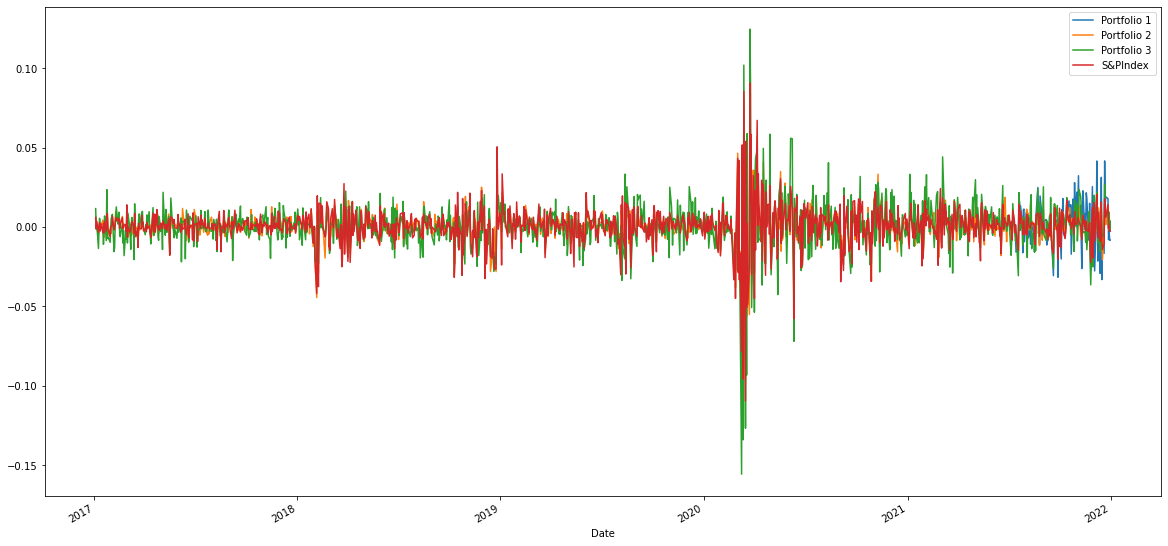

In [345]:
# Quantitative Analysis

# Performance analysis

# Plot daily returns of all portfolios

combined_df.plot(figsize=(20,10))

In [346]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,Portfolio 1,Portfolio 2,Portfolio 3,S&PIndex
Date,,,,
2017-01-04,NaN,1.006671,1.011623,1.005949
2017-01-05,NaN,1.010325,1.010169,1.005150
2017-01-06,NaN,1.009361,1.011997,1.008746
2017-01-09,NaN,1.004424,0.998411,1.005416
2017-01-10,NaN,1.001948,0.998458,1.005416


<AxesSubplot:xlabel='Date'>

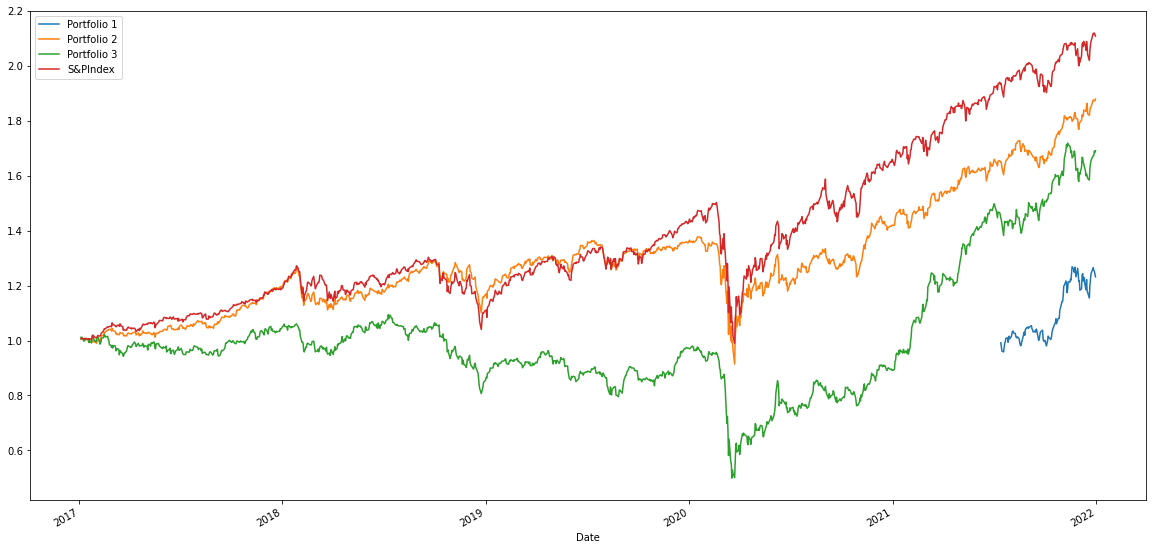

In [347]:
cumulative_returns.plot(figsize=(20,10))